In [1]:
import sys
import os
import json
import networkx as nx
# from networkx.algorithms import community
import community # python-louvain
import matplotlib.pyplot as plt

In [2]:

def parse_gfa(filename):
    with open(filename) as f:
        for line in f:
            eles = line.split()
            if eles[0] == 'S':
                contigs_dict[eles[1]] = {
                    'sequence': eles[2],
                    'length': eles[3]
                }
            if eles[0] == 'L':
                MG.add_edge(eles[1], eles[3], desc = eles[1:])

In [25]:
kcg = nx.karate_club_graph()

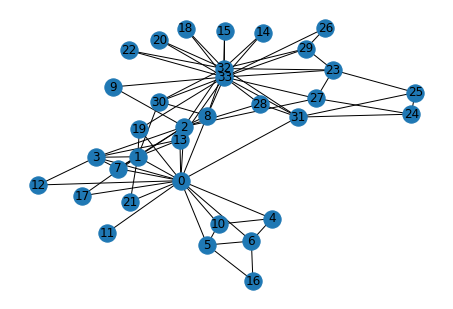

In [26]:
nx.draw(kcg, with_labels=True)

In [85]:
#first compute the best partition
partition = community.best_partition(kcg)

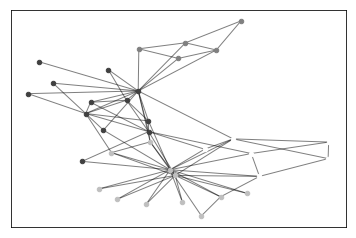

In [37]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.show()

partition at level 0 is {0: 0, 1: 1, 2: 0, 3: 0, 4: 2, 5: 3, 6: 3, 7: 0, 8: 4, 9: 0, 10: 2, 11: 0, 12: 0, 13: 0, 14: 4, 15: 4, 16: 3, 17: 1, 18: 4, 19: 1, 20: 4, 21: 1, 22: 4, 23: 5, 24: 6, 25: 6, 26: 7, 27: 5, 28: 6, 29: 7, 30: 4, 31: 6, 32: 4, 33: 4}


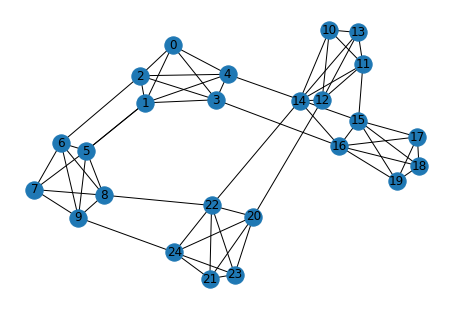

In [71]:
# build 5 complete graph
CG1 = nx.complete_graph( range(0,5) )
CG2 = nx.complete_graph( range(5,10) )
CG3 = nx.complete_graph( range(10,15) )
CG4 = nx.complete_graph( range(15,20) )
CG5 = nx.complete_graph( range(20,25) )

# add 5 complete graph to CG => 5 communities
CG = nx.MultiGraph()
CG.add_edges_from(CG1.edges)
CG.add_edges_from(CG2.edges)
CG.add_edges_from(CG3.edges)
CG.add_edges_from(CG4.edges)
CG.add_edges_from(CG5.edges)


#add links between 5 communities
CG.add_edges_from([(1,5,0.5), (1,5,0.75), (2,6,0.75)])
CG.add_edges_from([(4,15), (3,16)])
CG.add_edges_from([(9,24), (8,22)])
CG.add_edges_from([(12,20), (14,22)])
CG.add_edges_from([(11,15), (14,16)])

# draw CG
nx.draw(CG, with_labels=True)

In [75]:
# Find communities in CG and return the associated dendrogram
community.generate_dendrogram(CG)

[{0: 0,
  1: 0,
  2: 0,
  3: 0,
  4: 0,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 2,
  11: 2,
  12: 2,
  13: 2,
  14: 2,
  15: 3,
  16: 3,
  17: 3,
  18: 3,
  19: 3,
  20: 4,
  21: 4,
  22: 4,
  23: 4,
  24: 4}]

In [76]:
# real dataset: miniasm-pb-nies68_reads.gfa
contigs_dict = dict()
MG = nx.MultiGraph()

with open("./rawdata/miniasm-pb-nies68_reads.gfa") as f:
    for line in f:
        eles = line.split()
        if eles[0] == 'S':
            contigs_dict[eles[1]] = {
                'sequence': eles[2],
                'length': eles[3]
            }
        if eles[0] == 'L':
            MG.add_edge(eles[1], eles[3], desc = eles[1:])

In [82]:
list(MG.edges.data("desc"))

[('utg000001l',
  'utg000003l',
  ['utg000001l', '+', 'utg000003l', '-', '31185M', 'SD:i:80922']),
 ('utg000001l',
  'utg000003l',
  ['utg000003l', '+', 'utg000001l', '-', '31739M', 'SD:i:70233']),
 ('utg000001l',
  'utg003332l',
  ['utg000001l', '-', 'utg003332l', '+', '34489M', 'SD:i:77618']),
 ('utg000001l',
  'utg003332l',
  ['utg003332l', '-', 'utg000001l', '+', '34470M', 'SD:i:21649']),
 ('utg000001l',
  'utg001586l',
  ['utg000001l', '-', 'utg001586l', '-', '27875M', 'SD:i:84232']),
 ('utg000001l',
  'utg001586l',
  ['utg001586l', '+', 'utg000001l', '+', '27105M', 'SD:i:15889']),
 ('utg000003l',
  'utg003106l',
  ['utg000003l', '+', 'utg003106l', '-', '27962M', 'SD:i:74010']),
 ('utg000003l',
  'utg003106l',
  ['utg003106l', '+', 'utg000003l', '-', '28760M', 'SD:i:8909']),
 ('utg000003l',
  'utg001586l',
  ['utg000003l', '-', 'utg001586l', '+', '23292M', 'SD:i:78680']),
 ('utg000003l',
  'utg001586l',
  ['utg001586l', '-', 'utg000003l', '+', '22733M', 'SD:i:20261']),
 ('utg00000

In [451]:
# divide MG into clusters by connectivity
subgs = list(nx.connected_component_subgraphs(MG))
len(subgs[0])

3475

In [185]:
# Find communities in MG=>subgs[10] and return the associated dendrogram
dendro = community.generate_dendrogram(subgs[0])

In [136]:
for level in range(len(dendro) - 1) :
     print("partition at level", level,
           "is", community.partition_at_level(dendro, level))

partition at level 0 is {'utg000196l': 0, 'utg000660l': 1, 'utg001005l': 2, 'utg000777l': 3, 'utg000884l': 4, 'utg003237l': 5, 'utg001214l': 6, 'utg004431l': 7, 'utg003750l': 8, 'utg003705l': 9, 'utg001239l': 10, 'utg001538l': 11, 'utg004199l': 12, 'utg003089l': 13, 'utg003140l': 14, 'utg000203l': 15, 'utg003575l': 15, 'utg003578l': 16, 'utg003645l': 17, 'utg000845l': 18, 'utg003652l': 19, 'utg002346l': 20, 'utg004211l': 21, 'utg004098l': 22, 'utg003638l': 23, 'utg003338l': 24, 'utg000847l': 25, 'utg000340l': 26, 'utg003643l': 11, 'utg004503l': 27, 'utg001768l': 28, 'utg004235l': 29, 'utg003692l': 30, 'utg002812l': 31, 'utg003270l': 32, 'utg003315l': 33, 'utg000343l': 34, 'utg001057l': 35, 'utg001238l': 36, 'utg003748l': 37, 'utg004157l': 38, 'utg004253l': 39, 'utg004277l': 40, 'utg003658l': 41, 'utg003274l': 42, 'utg001392l': 43, 'utg001014l': 44, 'utg003238l': 45, 'utg001240l': 46, 'utg004186l': 47, 'utg003289l': 48, 'utg003341l': 49, 'utg004254l': 50, 'utg001696l': 51, 'utg004160l':

In [180]:
# A dendrogram is a tree and each level is a partition of the graph nodes. 
# Level 0 is the first partition, which contains the smallest communities, and the best is len(dendrogram) - 1. 
# The higher the level is, the bigger are the communities
dendro_0 = community.partition_at_level(dendro, 2)
dendro_0

{'utg000196l': 0,
 'utg000660l': 0,
 'utg001005l': 1,
 'utg000777l': 0,
 'utg000884l': 2,
 'utg003237l': 0,
 'utg001214l': 3,
 'utg004431l': 3,
 'utg003750l': 2,
 'utg003705l': 1,
 'utg001239l': 2,
 'utg001538l': 4,
 'utg004199l': 1,
 'utg003089l': 3,
 'utg003140l': 3,
 'utg000203l': 0,
 'utg003575l': 0,
 'utg003578l': 0,
 'utg003645l': 5,
 'utg000845l': 6,
 'utg003652l': 2,
 'utg002346l': 5,
 'utg004211l': 5,
 'utg004098l': 0,
 'utg003638l': 5,
 'utg003338l': 2,
 'utg000847l': 5,
 'utg000340l': 3,
 'utg003643l': 4,
 'utg004503l': 4,
 'utg001768l': 2,
 'utg004235l': 4,
 'utg003692l': 1,
 'utg002812l': 0,
 'utg003270l': 3,
 'utg003315l': 2,
 'utg000343l': 0,
 'utg001057l': 0,
 'utg001238l': 2,
 'utg003748l': 2,
 'utg004157l': 0,
 'utg004253l': 2,
 'utg004277l': 6,
 'utg003658l': 3,
 'utg003274l': 6,
 'utg001392l': 2,
 'utg001014l': 5,
 'utg003238l': 2,
 'utg001240l': 2,
 'utg004186l': 5,
 'utg003289l': 3,
 'utg003341l': 2,
 'utg004254l': 2,
 'utg001696l': 3,
 'utg004160l': 6,
 'utg00103

In [181]:
node_communities = dict()
for node_id, community_id in dendro_0.items():
    node_communities.setdefault(community_id, []).append(node_id)

In [182]:
for node_ids in node_communities.values():
    print( len( node_ids ) )

119
48
114
100
56
75
123


In [140]:
node_communities

{0: ['utg000196l', 'utg004101l'],
 1: ['utg000660l', 'utg000199l', 'utg003136l'],
 2: ['utg001005l', 'utg003689l'],
 3: ['utg000777l', 'utg004089l'],
 4: ['utg000884l', 'utg003319l', 'utg003667l'],
 5: ['utg003237l', 'utg001055l', 'utg004226l'],
 6: ['utg001214l', 'utg002383l'],
 7: ['utg004431l', 'utg003721l'],
 8: ['utg003750l', 'utg003629l'],
 9: ['utg003705l', 'utg001031l', 'utg001018l'],
 10: ['utg001239l', 'utg004261l', 'utg003669l'],
 11: ['utg001538l', 'utg003643l'],
 12: ['utg004199l', 'utg003688l', 'utg004205l'],
 13: ['utg003089l', 'utg003655l', 'utg004520l'],
 14: ['utg003140l', 'utg004091l'],
 15: ['utg000203l', 'utg003575l', 'utg003622l'],
 16: ['utg003578l', 'utg004073l'],
 17: ['utg003645l', 'utg001020l'],
 18: ['utg000845l', 'utg002705l'],
 19: ['utg003652l', 'utg001319l', 'utg003741l'],
 20: ['utg002346l', 'utg004453l', 'utg001248l'],
 21: ['utg004211l', 'utg003006l', 'utg004046l'],
 22: ['utg004098l', 'utg003137l', 'utg000883l'],
 23: ['utg003638l', 'utg001036l', 'ut

In [164]:
# try best_partition for subgs[10]
partition = community.best_partition(subgs[10])
partition

{'utg000196l': 0,
 'utg000660l': 0,
 'utg001005l': 1,
 'utg000777l': 0,
 'utg000884l': 2,
 'utg003237l': 0,
 'utg001214l': 3,
 'utg004431l': 1,
 'utg003750l': 2,
 'utg003705l': 1,
 'utg001239l': 2,
 'utg001538l': 4,
 'utg004199l': 4,
 'utg003089l': 3,
 'utg003140l': 3,
 'utg000203l': 0,
 'utg003575l': 0,
 'utg003578l': 0,
 'utg003645l': 5,
 'utg000845l': 4,
 'utg003652l': 6,
 'utg002346l': 6,
 'utg004211l': 5,
 'utg004098l': 0,
 'utg003638l': 5,
 'utg003338l': 7,
 'utg000847l': 4,
 'utg000340l': 0,
 'utg003643l': 5,
 'utg004503l': 6,
 'utg001768l': 2,
 'utg004235l': 6,
 'utg003692l': 4,
 'utg002812l': 0,
 'utg003270l': 3,
 'utg003315l': 6,
 'utg000343l': 0,
 'utg001057l': 2,
 'utg001238l': 2,
 'utg003748l': 2,
 'utg004157l': 0,
 'utg004253l': 2,
 'utg004277l': 4,
 'utg003658l': 1,
 'utg003274l': 1,
 'utg001392l': 6,
 'utg001014l': 5,
 'utg003238l': 2,
 'utg001240l': 2,
 'utg004186l': 5,
 'utg003289l': 3,
 'utg003341l': 2,
 'utg004254l': 2,
 'utg001696l': 5,
 'utg004160l': 1,
 'utg00103

In [162]:
node_communities = dict()
for node_id, community_id in partition.items():
    node_communities.setdefault(community_id, []).append(node_id)

In [163]:
for node_ids in node_communities.values():
    print( len( node_ids ) )

102
103
119
23
135
80
48
25


In [391]:
%time nx.algorithms.community.greedy_modularity_communities(subgs[0])

CPU times: user 1.49 s, sys: 12.4 ms, total: 1.5 s
Wall time: 1.52 s


[frozenset({'utg000061l',
            'utg000330l',
            'utg000346l',
            'utg000456l',
            'utg000465l',
            'utg000515l',
            'utg000714l',
            'utg000735l',
            'utg000736l',
            'utg000751l',
            'utg000906l',
            'utg001138l',
            'utg001180l',
            'utg001251l',
            'utg001306l',
            'utg001315l',
            'utg001362l',
            'utg001363l',
            'utg001422l',
            'utg001438l',
            'utg001505l',
            'utg001569l',
            'utg001580l',
            'utg001582l',
            'utg001599l',
            'utg001602l',
            'utg001603l',
            'utg001608l',
            'utg001609l',
            'utg001611l',
            'utg001613l',
            'utg001618l',
            'utg001625l',
            'utg001629l',
            'utg001630l',
            'utg001631l',
            'utg001632l',
            'utg001634l',
            

In [390]:
%time pythonlouvaincommunity.generate_dendrogram(subgs[0])

CPU times: user 4.1 s, sys: 19.2 ms, total: 4.12 s
Wall time: 4.17 s


[{'utg000001l': 0,
  'utg000003l': 0,
  'utg003332l': 1,
  'utg001586l': 0,
  'utg000002l': 2,
  'utg000773l': 3,
  'utg000005l': 4,
  'utg004108l': 2,
  'utg003106l': 5,
  'utg001419l': 6,
  'utg000004l': 7,
  'utg000006l': 7,
  'utg003292l': 8,
  'utg003092l': 4,
  'utg002757l': 9,
  'utg000007l': 10,
  'utg003109l': 11,
  'utg003107l': 7,
  'utg003003l': 12,
  'utg002869l': 10,
  'utg000008l': 13,
  'utg001680l': 14,
  'utg000009l': 15,
  'utg003569l': 13,
  'utg001504l': 14,
  'utg001195l': 15,
  'utg002129l': 15,
  'utg000010l': 13,
  'utg004056l': 14,
  'utg000011l': 16,
  'utg001566l': 17,
  'utg003570l': 18,
  'utg003908l': 19,
  'utg001200l': 16,
  'utg000012l': 20,
  'utg001185l': 21,
  'utg000930l': 20,
  'utg000013l': 22,
  'utg002685l': 23,
  'utg000500l': 22,
  'utg000014l': 24,
  'utg003516l': 24,
  'utg001756l': 25,
  'utg000015l': 26,
  'utg000294l': 26,
  'utg001749l': 27,
  'utg000016l': 28,
  'utg003902l': 29,
  'utg000077l': 28,
  'utg002239l': 30,
  'utg000018l': 

In [202]:
# nx.algorithms.community.greedy_modularity_communities is faster than python-louvain

In [455]:
from networkx.algorithms import community
# import community # python-louvain

# get 73 communities from subgs[0]
node_communities = list( community.greedy_modularity_communities(subgs[0]) )

In [456]:
# for c_id, node_community in enumerate( community.greedy_modularity_communities(MG) ):
#     print( c_id, len(node_community) )
len( node_communities )

73

In [457]:
# #72 community has 5 nodes
node_communities[72]

frozenset({'utg000561l',
           'utg001870l',
           'utg002879l',
           'utg003128l',
           'utg003132l'})

In [458]:
# all edges related to #72 community
list( subgs[0].edges( node_communities[72] ) )

[('utg003132l', 'utg000561l'),
 ('utg003132l', 'utg000561l'),
 ('utg003132l', 'utg001870l'),
 ('utg003132l', 'utg001870l'),
 ('utg003132l', 'utg002879l'),
 ('utg003132l', 'utg002879l'),
 ('utg001870l', 'utg003128l'),
 ('utg001870l', 'utg003128l'),
 ('utg002879l', 'utg003128l'),
 ('utg002879l', 'utg003128l'),
 ('utg002879l', 'utg003628l'),
 ('utg002879l', 'utg003628l'),
 ('utg003128l', 'utg000561l'),
 ('utg003128l', 'utg000561l')]

In [255]:
# extract #72 community and all related edges (nodes) as a subgraph subgs0_72_expansion
tempG = nx.MultiGraph()
tempG.add_edges_from( subgs[0].edges( node_communities[72] ) )

subgs0_72_expansion = subgs[0].subgraph( tempG.nodes )

In [232]:
# extract #72 community as a subgraph subgs0_72
subgs0_72 = subgs[0].subgraph(node_communities[72])

In [260]:
# edges only within #72 community
list(subgs0_72.edges)

[('utg003132l', 'utg000561l', 0),
 ('utg003132l', 'utg000561l', 1),
 ('utg003132l', 'utg001870l', 0),
 ('utg003132l', 'utg001870l', 1),
 ('utg003132l', 'utg002879l', 0),
 ('utg003132l', 'utg002879l', 1),
 ('utg001870l', 'utg003128l', 0),
 ('utg001870l', 'utg003128l', 1),
 ('utg002879l', 'utg003128l', 0),
 ('utg002879l', 'utg003128l', 1),
 ('utg003128l', 'utg000561l', 0),
 ('utg003128l', 'utg000561l', 1)]

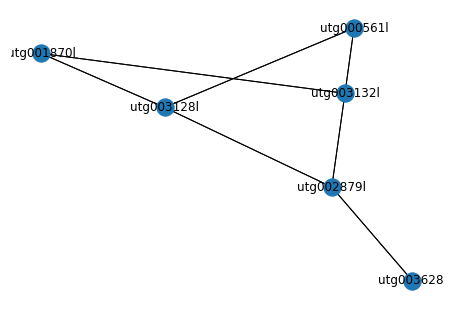

In [266]:
nx.draw(subgs0_72_expansion, with_labels=True)

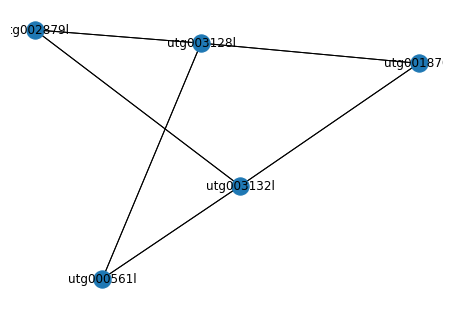

In [265]:
nx.draw(subgs0_72, with_labels=True)

In [459]:
node_communities[50]

frozenset({'utg000014l',
           'utg000078l',
           'utg000106l',
           'utg000158l',
           'utg000299l',
           'utg000424l',
           'utg000429l',
           'utg000432l',
           'utg000615l',
           'utg000691l',
           'utg000711l',
           'utg000955l',
           'utg001173l',
           'utg001506l',
           'utg001542l',
           'utg001689l',
           'utg001756l',
           'utg001972l',
           'utg002025l',
           'utg002045l',
           'utg002065l',
           'utg002359l',
           'utg002559l',
           'utg002909l',
           'utg003032l',
           'utg003080l',
           'utg003150l',
           'utg003498l',
           'utg003503l',
           'utg003516l',
           'utg003519l',
           'utg003581l',
           'utg004064l',
           'utg004539l'})

In [485]:
tempG = nx.MultiGraph()
tempG.add_edges_from( subgs[0].edges( node_communities[50] ) )

subgs0_50_expansion = subgs[0].subgraph( tempG.nodes )
subgs0_50 = subgs[0].subgraph(node_communities[50])

In [486]:
expansion_nodes = set( subgs0_50_expansion.nodes ) - set( subgs0_50.nodes )
expansion_nodes

{'utg000696l',
 'utg000821l',
 'utg001654l',
 'utg003420l',
 'utg004131l',
 'utg004215l',
 'utg004455l'}

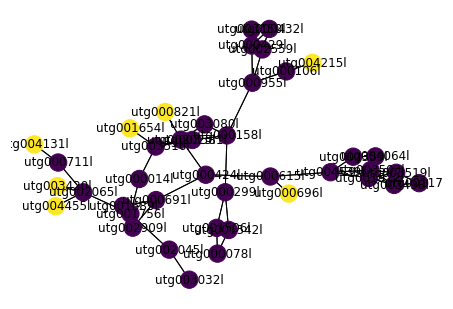

In [487]:
# yellow color node => nodes belonging to other communities
val_map = {
    'utg000696l': 0.5714285714285714,
    'utg000821l': 0.5714285714285714,
    'utg001654l': 0.5714285714285714,
    'utg003420l': 0.5714285714285714,
    'utg004131l': 0.5714285714285714,
    'utg004215l': 0.5714285714285714,
    'utg004455l': 0.5714285714285714
}
values = [ val_map.get(node, 0.0) for node in subgs0_50_expansion.nodes() ]
nx.draw(subgs0_50_expansion, cmap=plt.get_cmap('viridis'), node_color=values, with_labels=True)

In [524]:
# find connections between #50 and #X
expansion_nodes_50 = set( subgs0_50_expansion.nodes ) - set( subgs0_50.nodes )
expansion_nodes_50

{'utg000696l',
 'utg000821l',
 'utg001654l',
 'utg003420l',
 'utg004131l',
 'utg004215l',
 'utg004455l'}

In [579]:
expansion_edges_50 = set( [ tuple(data[2]) for data in subgs0_50_expansion.edges.data('desc') ] ) - set( [ tuple(data[2]) for data in subgs0_50.edges.data('desc') ] )
expansion_edges_50

{('utg000106l', '-', 'utg004215l', '-', '25353M', 'SD:i:216724'),
 ('utg000615l', '-', 'utg000696l', '+', '14500M', 'SD:i:201430'),
 ('utg000696l', '-', 'utg000615l', '+', '14584M', 'SD:i:5189'),
 ('utg000711l', '-', 'utg004131l', '+', '16214M', 'SD:i:65593'),
 ('utg000821l', '-', 'utg002025l', '+', '20169M', 'SD:i:123047'),
 ('utg001654l', '-', 'utg003516l', '-', '6898M', 'SD:i:33378'),
 ('utg002025l', '-', 'utg000821l', '+', '19419M', 'SD:i:73374'),
 ('utg002065l', '+', 'utg003420l', '-', '11646M', 'SD:i:20438'),
 ('utg002065l', '+', 'utg004455l', '+', '12767M', 'SD:i:19317'),
 ('utg003420l', '+', 'utg002065l', '-', '11225M', 'SD:i:7695'),
 ('utg003516l', '+', 'utg001654l', '+', '6813M', 'SD:i:4070'),
 ('utg004131l', '-', 'utg000711l', '+', '16296M', 'SD:i:2332'),
 ('utg004215l', '+', 'utg000106l', '+', '21710M', 'SD:i:5600'),
 ('utg004455l', '-', 'utg002065l', '-', '12733M', 'SD:i:8363')}

In [580]:
X = 5
tempG = nx.MultiGraph( subgs[0].edges( node_communities[X] ) )

subgs0_X_expansion = subgs[0].subgraph( tempG.nodes )
subgs0_X = subgs[0].subgraph( node_communities[X] )

# expansion_nodes_X = set( subgs0_X_expansion.nodes ) - set( subgs0_X.nodes )
# expansion_nodes_X

expansion_edges_X = set( [ tuple(data[2]) for data in subgs0_X_expansion.edges.data('desc') ] ) - set( [ tuple(data[2]) for data in subgs0_X.edges.data('desc') ] )
expansion_edges_X

{('utg000075l', '-', 'utg000309l', '-', '12564M', 'SD:i:248618'),
 ('utg000075l', '-', 'utg001971l', '+', '11162M', 'SD:i:250020'),
 ('utg000080l', '-', 'utg000633l', '+', '13751M', 'SD:i:376734'),
 ('utg000106l', '-', 'utg004215l', '-', '25353M', 'SD:i:216724'),
 ('utg000133l', '+', 'utg001383l', '-', '18748M', 'SD:i:435420'),
 ('utg000209l', '-', 'utg002342l', '+', '15935M', 'SD:i:256183'),
 ('utg000239l', '-', 'utg000281l', '-', '9803M', 'SD:i:15349'),
 ('utg000240l', '-', 'utg002355l', '-', '14221M', 'SD:i:196196'),
 ('utg000254l', '+', 'utg002354l', '+', '15031M', 'SD:i:5142'),
 ('utg000281l', '+', 'utg000239l', '+', '10327M', 'SD:i:112481'),
 ('utg000281l', '-', 'utg000515l', '-', '16373M', 'SD:i:106435'),
 ('utg000309l', '+', 'utg000075l', '+', '12441M', 'SD:i:33648'),
 ('utg000351l', '-', 'utg002577l', '+', '6057M', 'SD:i:37641'),
 ('utg000423l', '+', 'utg004072l', '-', '14706M', 'SD:i:688713'),
 ('utg000444l', '-', 'utg001596l', '+', '15276M', 'SD:i:155089'),
 ('utg000515l', '

In [535]:
expansion_edges_50 & expansion_edges_X

{('utg000106l', 'utg004215l', 0), ('utg000106l', 'utg004215l', 1)}

In [613]:
#node_communities = list( community.greedy_modularity_communities( subgs[0]) )
# tempG = nx.MultiGraph()
# tempG.add_edges_from( subgs[0].edges( node_communities[50] ) )

# subgs0_50_expansion = subgs[0].subgraph( tempG.nodes )
# subgs0_50 = subgs[0].subgraph(node_communities[50])
# expansion_edges_50 = set(subgs0_50_expansion.edges) - set( subgs0_50.edges )
c50_shared_expansion_edges_list = list()
c50_shared_expansion_edges_dict = dict()

# get 73 communities from subgs[0]
# find connections with community#50 from all 73 communities
# len(node_communities) => 73
for c_id, node_community in enumerate( node_communities ):
    if c_id == 50: continue
    
    X = c_id
    tempG = nx.MultiGraph( subgs[0].edges( node_communities[X] )  )

    subgs0_X_expansion = subgs[0].subgraph( tempG.nodes )
    subgs0_X = subgs[0].subgraph( node_communities[X] )

    #expansion_nodes_X = set( subgs0_X_expansion.nodes ) - set( subgs0_X.nodes )
    expansion_edges_X = set([ tuple(data[2]) for data in subgs0_X_expansion.edges.data('desc')] ) - \
                            set( tuple(data[2]) for data in subgs0_X.edges.data('desc') )
    
    if expansion_edges_50 & expansion_edges_X:
        c50_shared_expansion_edges_list.append( [X]+list(expansion_edges_50 & expansion_edges_X)  )
        c50_shared_expansion_edges_dict[X] = list( expansion_edges_50 & expansion_edges_X )
        #print( X, expansion_edges_50 & expansion_edges_X )
c50_shared_expansion_edges_dict

{0: [('utg004455l', '-', 'utg002065l', '-', '12733M', 'SD:i:8363'),
  ('utg001654l', '-', 'utg003516l', '-', '6898M', 'SD:i:33378'),
  ('utg003516l', '+', 'utg001654l', '+', '6813M', 'SD:i:4070'),
  ('utg002065l', '+', 'utg003420l', '-', '11646M', 'SD:i:20438'),
  ('utg002065l', '+', 'utg004455l', '+', '12767M', 'SD:i:19317'),
  ('utg003420l', '+', 'utg002065l', '-', '11225M', 'SD:i:7695')],
 1: [('utg000615l', '-', 'utg000696l', '+', '14500M', 'SD:i:201430'),
  ('utg000696l', '-', 'utg000615l', '+', '14584M', 'SD:i:5189')],
 5: [('utg004215l', '+', 'utg000106l', '+', '21710M', 'SD:i:5600'),
  ('utg000106l', '-', 'utg004215l', '-', '25353M', 'SD:i:216724')],
 53: [('utg000821l', '-', 'utg002025l', '+', '20169M', 'SD:i:123047'),
  ('utg002025l', '-', 'utg000821l', '+', '19419M', 'SD:i:73374')],
 58: [('utg004131l', '-', 'utg000711l', '+', '16296M', 'SD:i:2332'),
  ('utg000711l', '-', 'utg004131l', '+', '16214M', 'SD:i:65593')]}

In [587]:
json

<module 'json' from '/Users/zhuyue/.pyenv/versions/3.6.3/lib/python3.6/json/__init__.py'>

In [378]:
#0,  #1, #5, #53, #58 has connections with #50

{('utg000106l', 'utg004215l', 0),
 ('utg000106l', 'utg004215l', 1),
 ('utg000696l', 'utg000615l', 0),
 ('utg000696l', 'utg000615l', 1),
 ('utg002025l', 'utg000821l', 0),
 ('utg002025l', 'utg000821l', 1),
 ('utg003420l', 'utg002065l', 0),
 ('utg003420l', 'utg002065l', 1),
 ('utg003516l', 'utg001654l', 0),
 ('utg003516l', 'utg001654l', 1),
 ('utg004131l', 'utg000711l', 0),
 ('utg004131l', 'utg000711l', 1),
 ('utg004455l', 'utg002065l', 0),
 ('utg004455l', 'utg002065l', 1)}

In [577]:
# set(subgs0_50_expansion.edges.data('desc')) - set( subgs0_50.edges.data('desc') )
set( [ tuple(data[2]) for data in subgs0_50_expansion.edges.data('desc') ] )

{('utg000014l', '+', 'utg003516l', '+', '9573M', 'SD:i:175363'),
 ('utg000014l', '-', 'utg001756l', '+', '11809M', 'SD:i:173127'),
 ('utg000078l', '+', 'utg001506l', '-', '14111M', 'SD:i:204418'),
 ('utg000078l', '+', 'utg001542l', '+', '14979M', 'SD:i:203550'),
 ('utg000106l', '+', 'utg000955l', '-', '14991M', 'SD:i:227086'),
 ('utg000106l', '-', 'utg004215l', '-', '25353M', 'SD:i:216724'),
 ('utg000158l', '+', 'utg003080l', '+', '7634M', 'SD:i:110217'),
 ('utg000158l', '+', 'utg003581l', '+', '8795M', 'SD:i:109056'),
 ('utg000158l', '-', 'utg000299l', '-', '14728M', 'SD:i:103123'),
 ('utg000158l', '-', 'utg000955l', '-', '16015M', 'SD:i:101836'),
 ('utg000299l', '+', 'utg000158l', '+', '14630M', 'SD:i:196682'),
 ('utg000299l', '-', 'utg001506l', '-', '14274M', 'SD:i:197038'),
 ('utg000299l', '-', 'utg001542l', '+', '15152M', 'SD:i:196160'),
 ('utg000424l', '+', 'utg000615l', '+', '14463M', 'SD:i:215383'),
 ('utg000424l', '-', 'utg000691l', '-', '19226M', 'SD:i:210620'),
 ('utg000424l

In [628]:
try:
    d1['nam']['']
    print('yes')
except:
    print('error')

error


In [631]:
164672/4815


34.19979231568016

In [3]:
# real dataset: graph_final_hairball.gfa
contigs_dict = dict()
MG = nx.MultiGraph()

with open("./rawdata/graph_final_hairball.gfa") as f:
    for line in f:
        eles = line.split()
        if eles[0] == 'S':
            contigs_dict[eles[1]] = {
                'sequence': eles[2],
                'length': eles[3]
            }
        if eles[0] == 'L':
            MG.add_edge(eles[1], eles[3], desc = eles[1:])

In [4]:
# divide MG into clusters by connectivity
subgs = list(nx.connected_component_subgraphs(MG))
len(subgs[0])

671

In [7]:
from networkx.algorithms import community

# get 73 communities from subgs[0]
node_communities = list( community.greedy_modularity_communities(subgs[0]) )

In [13]:
# #72 community
node_communities

12
10
9
9
9
9
8
8
8
7
6
6
6
6
5
5
5
5
5
5
4
4
4
4
4
4
4
4
4
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
